In [11]:
# !pip install tensorflow

  Using cached tensorflow-2.17.0-cp39-cp39-win_amd64.whl (2.0 kB)
  Using cached tensorflow_intel-2.17.0-cp39-cp39-win_amd64.whl (385.0 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached ml_dtypes-0.4.0-cp39-cp39-win_amd64.whl (126 kB)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached protobuf-4.25.4-cp39-cp39-win_amd64.whl (413 kB)
  Using cached grpcio-1.66.1-cp39-cp39-win_amd64.whl (4.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
 

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3496 - loss: 1.7597 - val_accuracy: 0.5610 - val_loss: 1.2261
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5726 - loss: 1.1962 - val_accuracy: 0.6075 - val_loss: 1.1086
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6498 - loss: 1.0044 - val_accuracy: 0.6502 - val_loss: 0.9991
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6827 - loss: 0.9021 - val_accuracy: 0.6840 - val_loss: 0.9118
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7092 - loss: 0.8318 - val_accuracy: 0.6913 - val_loss: 0.8926
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7306 - loss: 0.7697 - val_accuracy: 0.6941 - val_loss: 0.8833
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7522 - loss: 0.7066 - val_accuracy: 0.7078 - val_loss: 0.8679
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7663 - loss: 0

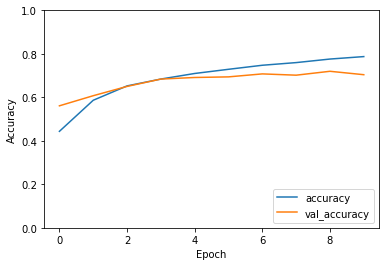

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


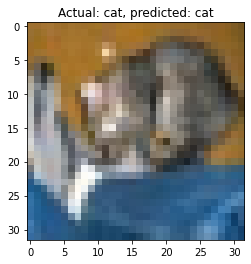

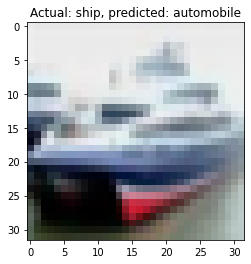

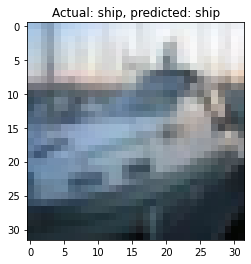

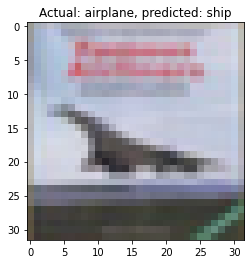

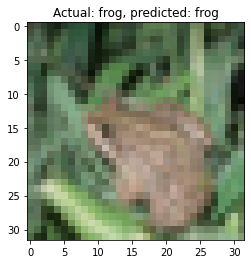

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the data (scale the pixel values to range[0,1])
x_train,x_test = x_train /255.0, x_test / 255.0

#Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a simple CNN model
model = models.Sequential()

# First Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional layer
model.add(layers.Conv2D(64, (3, 3),activation='relu'))

# Flatten the data to feed it into Dense layers
model.add(layers.Flatten())

# Fully connected Dense layer
model.add(layers.Dense(64, activation='relu'))

# output layer (10 categories for CIFAR-10)
model.add(layers.Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the best test set 
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=2)
print(f'Test accuracy:{test_acc:.4f}')

# plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Make predictions on the test set 
y_pred = model.predict(x_test)

# Visualizing a few images with predictions 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Displaying the first 5 images and their predicted labels
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}, predicted: {class_names[np.argmax(y_pred[i])]}")
    plt.show()